# 0.0 Import

In [1]:
import pickle

import numpy                as np
import pandas               as pd
import seaborn              as sns
import matplotlib.patches   as mpatches

from matplotlib import pyplot as plt


from scipy                  import stats
from IPython.display        import Image
from IPython.core.display   import HTML

## 0.1 Help functions

In [2]:
# Supressão de Notação Científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.4f}'.format)

In [3]:
# Corrigir Gráficos Jupter

def jupyter_settings():
    %matplotlib inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [16, 12]
    plt.rcParams['font.size'] = 12

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

jupyter_settings()

## 0.2 Load interim data

In [4]:
df3 = pickle.load( open( "../data/interim/df2_feature.pkl", "rb" ) )
df3.head()

,id,genero,idade,codigo_regiao,contato_cliente,cnh,idade_veiculo,veiculo_danificado,seguro_previo_automovel,premio_anual,cliente_dias_contrato,resposta
0,1,Male,44,28.0000,26.0000,1,3,1,0,40454.0000,217,1
1,2,Male,76,3.0000,26.0000,1,2,0,0,33536.0000,183,0
2,3,Male,47,28.0000,26.0000,1,3,1,0,38294.0000,27,1
3,4,Male,21,11.0000,152.0000,1,1,0,1,28619.0000,203,0
4,5,Female,29,41.0000,152.0000,1,1,0,1,27496.0000,39,0


# 1.0 EDA

In [5]:
df3.columns

Index(['id', 'genero', 'idade', 'codigo_regiao', 'contato_cliente', 'cnh',
       'idade_veiculo', 'veiculo_danificado', 'seguro_previo_automovel',
       'premio_anual', 'cliente_dias_contrato', 'resposta'],
      dtype='object')

## 1.1 Univariada

### 1.1.1 idade

<AxesSubplot:xlabel='idade', ylabel='Count'>

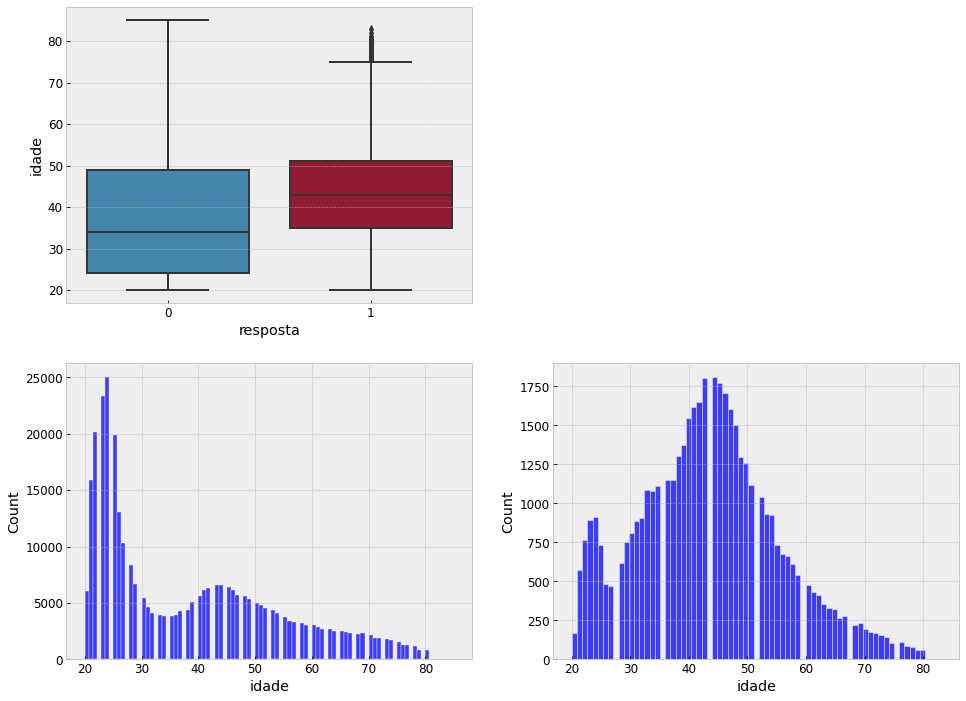

In [6]:
#'idade'
plt.subplot(2,2,1)
sns.boxplot(x='resposta', y='idade', data=df3)

aux1 = df3.loc[df3['resposta'] == 0, 'idade']
plt.subplot(2,2,3)
sns.histplot(x=aux1)

aux2 = df3.loc[df3['resposta'] == 1, 'idade']
plt.subplot(2,2,4)
sns.histplot(x=aux2)

Insight:

 - Pessoas mais velhas tem mais interesse no produto.

 - Pelo boxplot há uma concentração de dados para pessoas mais velhas.

 - Pessoas mais novas tem menos interesse no produto.

 - Cuidado com o balanceamento dos dados.

 - Idade pode ser útil para o modelo.

In [7]:
del aux1, aux2

### 1.1.2 premio_anual

<AxesSubplot:xlabel='premio_anual', ylabel='Count'>

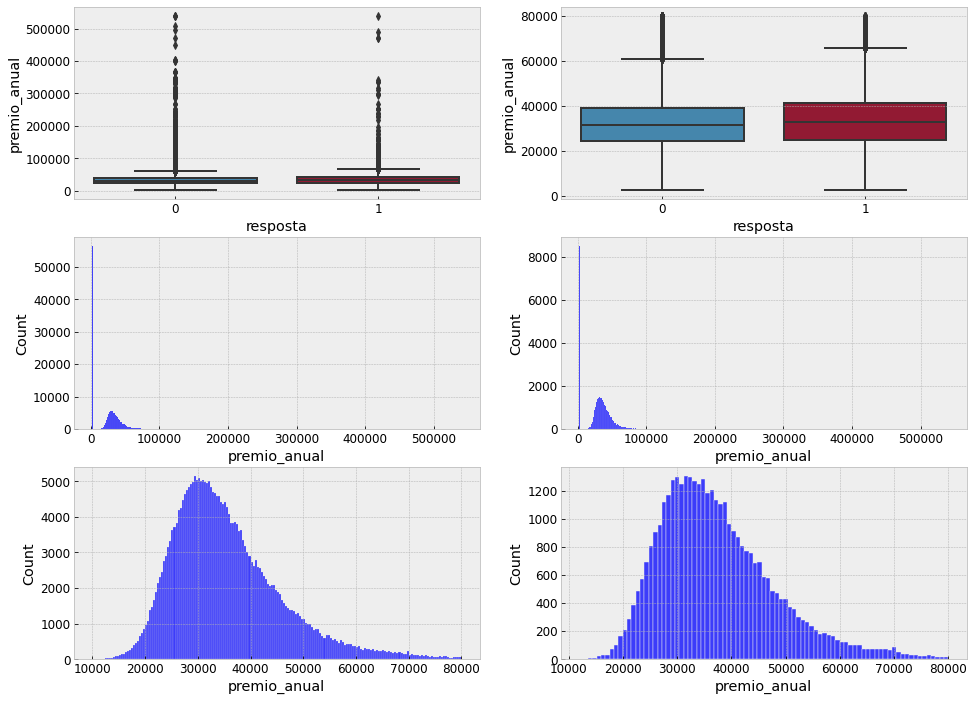

In [8]:
#'premio_anual'
#plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.boxplot(x='resposta', y='premio_anual', data=df3)

aux1 = df3[df3['premio_anual'] < 80000]
plt.subplot(3,2,2)
sns.boxplot(x='resposta', y='premio_anual', data=aux1)

aux2 = df3.loc[df3['resposta'] == 0, 'premio_anual']
plt.subplot(3,2,3)
sns.histplot(x=aux2)

aux3 = df3.loc[df3['resposta'] == 1, 'premio_anual']
plt.subplot(3,2,4)
sns.histplot(x=aux3)

# Filto pelo valor do premio_anual #
aux4 = df3[(df3['premio_anual'] > 10000) & (df3['premio_anual'] < 80000)]

aux5 = aux4.loc[aux4['resposta'] == 0, 'premio_anual']
plt.subplot(3,2,5)
sns.histplot(x=aux5)

aux6 = aux4.loc[aux4['resposta'] == 1, 'premio_anual']
plt.subplot(3,2,6)
sns.histplot(x=aux6)

Insight:

 - Há muitos outliers.

 - No boxplot não há diferênça factual entre as distribuições.

 - Cuidado com o balanceamento dos dados.

 - As curvas estão bem parecida, então essa variável só não me diz muita coisa.

 - Essa variável pode ser atrelada a outras para ajudar no Modelo.

In [9]:
del aux1, aux2, aux3, aux4, aux5, aux6

### 1.1.3 cnh

,resposta,cnh,cnh_percent
0,0,333628,0.8773
1,1,46669,0.1227


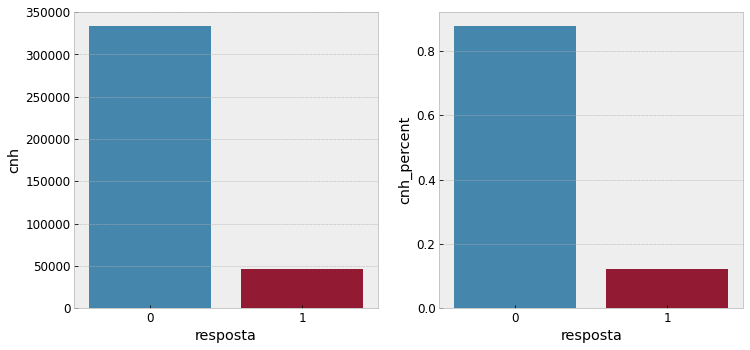

In [10]:
#'cnh'
plt.figure(figsize=(12,12))

aux1 = df3[['cnh', 'resposta']].groupby(['resposta']).sum().reset_index()
plt.subplot(2,2,1)
sns.barplot(x='resposta', y='cnh', data=aux1, ci= True)

aux1['cnh_percent'] = aux1['cnh'] / aux1['cnh'].sum()
plt.subplot(2,2,2)
sns.barplot(x='resposta', y='cnh_percent', data=aux1, ci= True)

aux1

Insight:

 - Muito interessante, quem tem CNH tem bem menos predisposição a contratar o produto.

 - Atenção a idade pode está interferindo nessa visualização.

 - Deve ser analizado, pelo menos, em conjunto com a idade.

In [11]:
del aux1

### 1.1.4 codigo_regiao

<AxesSubplot:xlabel='codigo_regiao', ylabel='id'>

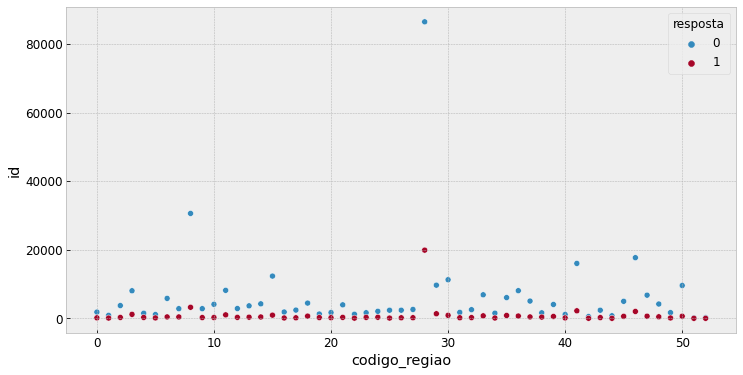

In [12]:
#'codigo_regiao'

aux1 = df3[['id', 'resposta', 'codigo_regiao']].groupby(['codigo_regiao','resposta',]).count().reset_index()
plt.figure(figsize=(12,6))
sns.scatterplot(x='codigo_regiao', y='id', data=aux1, hue='resposta')

Insight:

 - A variável resposta em relação ao código_região está muito junta, difícil de separar.

 - Não há uma separação clara dos valores. Poucas regiões tem uma separção mais clara.

 - Essa variável, possivelmente, deve ser agregada a outra para performar melhor no modelo.

In [13]:
del aux1

### 1.1.5 veiculo_danificado'

In [14]:
#'veiculo_danificado'
pd.crosstab(df3['veiculo_danificado'], df3['resposta']).apply(lambda x: x/x.sum(), axis=1)

resposta,0,1
veiculo_danificado,,
0,0.9948,0.0052
1,0.7623,0.2377


Insight:

 - Para os veículos danificados os consimidores praticamente não tem interesse, mas deve-se ter muita atenção.
     - Para estar assim, vai muito do negócio, mas podemos pensar que:
     - As pessoas que já bateram seu carro não tiveram boa experiência com seguros.
     - Já que não é pago o seguro do carro, para quê um seguro de saúde.
     - O custo de manter um seguro, pode ser muito alto.
    

 - Para aqueles que já tem seguro, isso muda, um pouco, a pesrpectiva, mas mesmo assim deve-se ter cuidado com essa variável.

### 1.1.6 idade_veiculo

In [15]:
#'idade_veiculo'

df3[['idade_veiculo', 'resposta']].value_counts( normalize=True ).reset_index().sort_values(by='idade_veiculo')

,idade_veiculo,resposta,0
1,1,0,0.4135
4,1,1,0.0189
0,2,0,0.4343
2,2,1,0.0913
3,3,0,0.0297
5,3,1,0.0123


Insight:

A idade de 1 e 2 anos discimina muito bem quem gostaria ou não contratar o produto.

### 1.1.7 contato_cliente

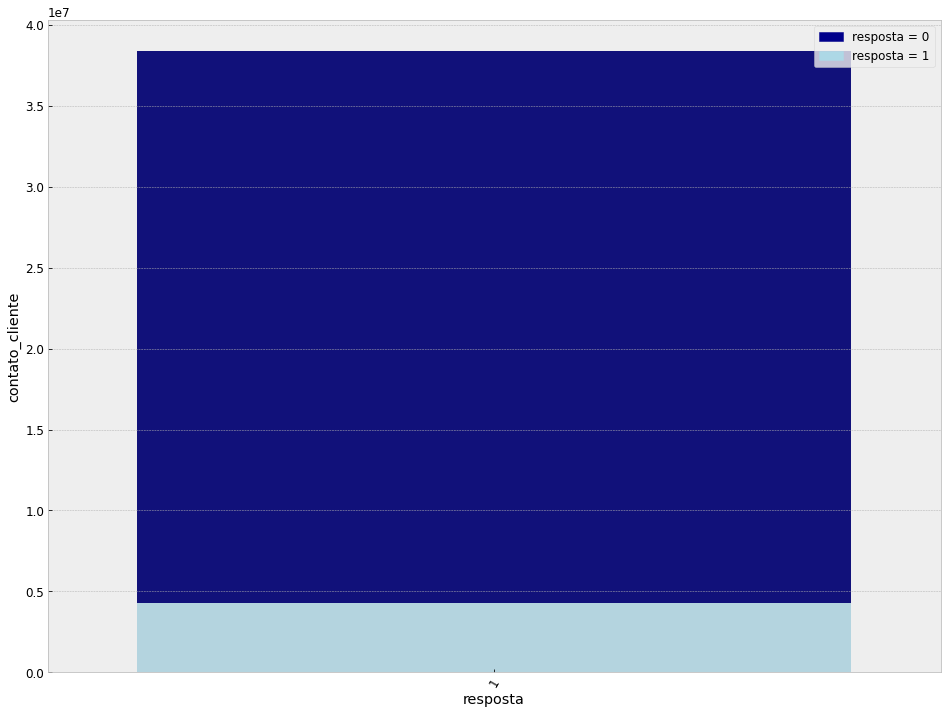

In [16]:
#aux1 = df3.groupby(['contato_cliente'])['resposta'].sum().reset_index()
aux1 = df3[['contato_cliente', 'resposta']].groupby(['resposta']).sum().reset_index()

bar1 = sns.barplot(x='resposta', y='contato_cliente', data=aux1, color='darkblue')

resposta1 = df3[df3.resposta==1]

bar2 = sns.barplot(x='resposta', y='contato_cliente', data=resposta1, estimator=sum, ci=None, color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label='resposta = 0')
bottom_bar = mpatches.Patch(color='lightblue', label='resposta = 1')
plt.legend(handles=[top_bar, bottom_bar])

plt.xticks(rotation=60);
plt.show()

<AxesSubplot:xlabel='resposta', ylabel='contato_cliente'>

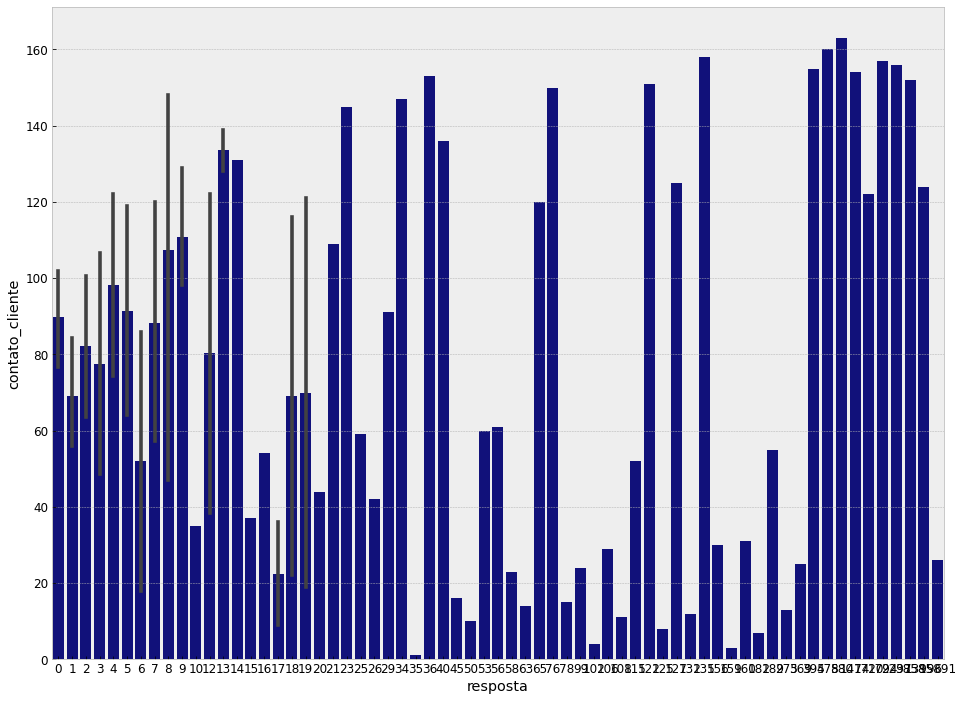

In [17]:
aux1 = df3[['contato_cliente', 'resposta']].groupby(['contato_cliente']).sum().reset_index()

sns.barplot(x='resposta', y='contato_cliente', data=aux1, color='darkblue')

Insight:

Quais seriam os melhores canais para contato com esse cliente?

### 1.1.8 seguro_previo_automovel

<AxesSubplot:xlabel='seguro_previo_automovel', ylabel='resposta'>

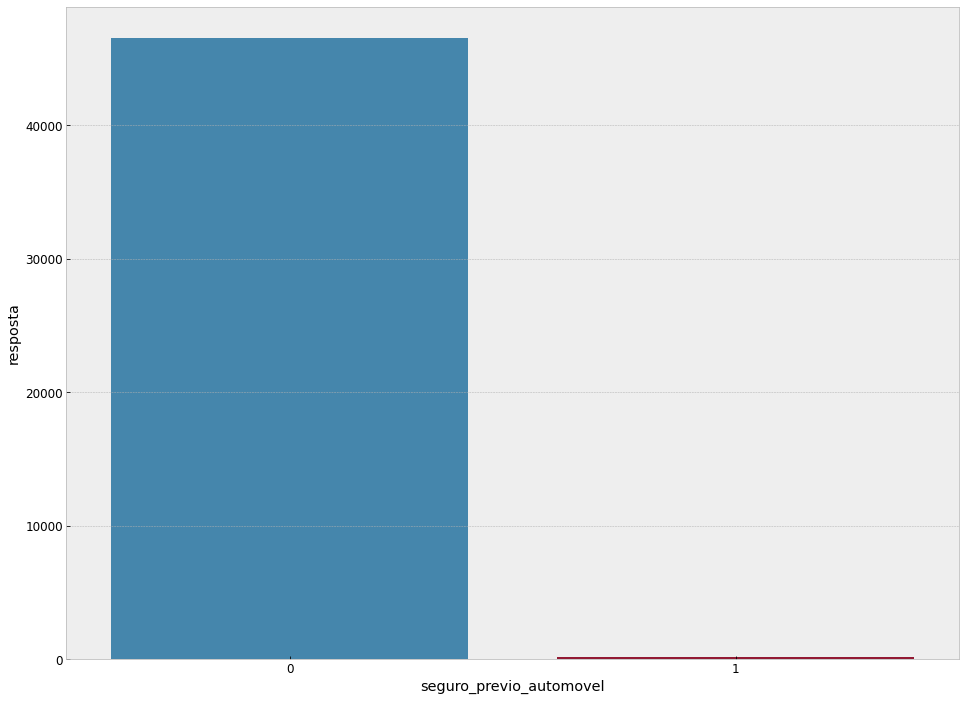

In [18]:
#'seguro_previo_automovel'
aux1 = df3[['seguro_previo_automovel', 'resposta']].groupby(['seguro_previo_automovel']).sum().reset_index()
sns.barplot(x='seguro_previo_automovel', y='resposta', data=aux1)

### 1.1.9 cliente_dias_contrato

<AxesSubplot:xlabel='cliente_dias_contrato', ylabel='Count'>

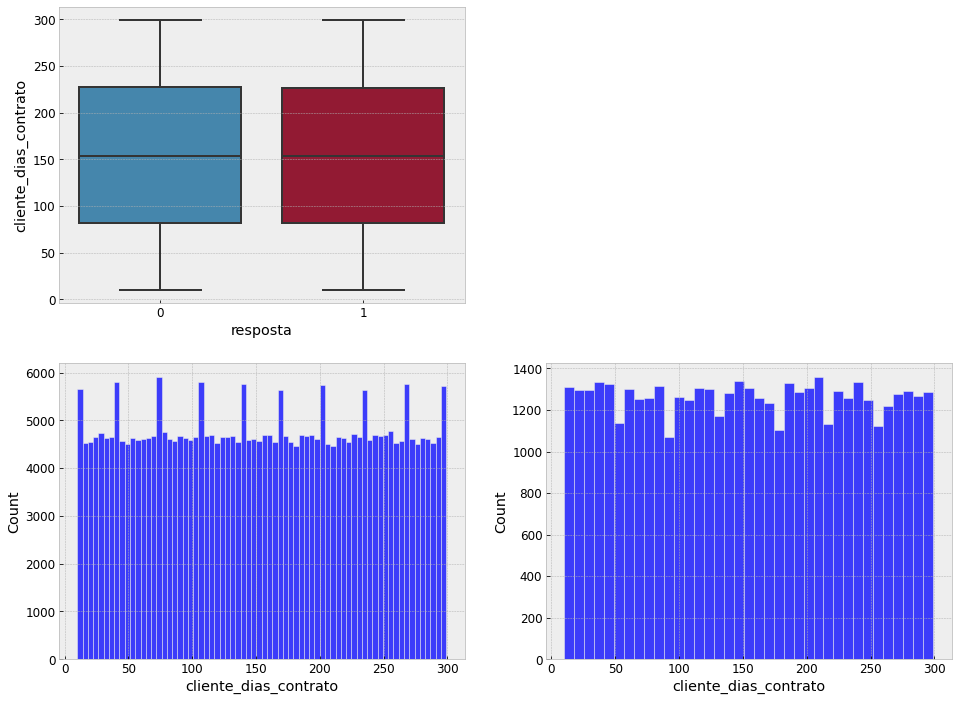

In [19]:
#'cliente_dias_contrato'
#plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.boxplot(x='resposta', y='cliente_dias_contrato', data=df3)


aux2 = df3.loc[df3['resposta'] == 0, 'cliente_dias_contrato']
plt.subplot(2,2,3)
sns.histplot(x=aux2)

aux3 = df3.loc[df3['resposta'] == 1, 'cliente_dias_contrato']
plt.subplot(2,2,4)
sns.histplot(x=aux3)

Insight:

## 1.2 Bivariada

## 1.3 Multivariada

## 1.4 Hipóteses
Inserida no __2º Cíclo CRISP__